## Observations and Insights 

In [81]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [82]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [83]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [84]:
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [85]:
# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [86]:
# Checking the number of mice.
len(combined_data["Mouse ID"].unique())


249

In [87]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"], keep=False)]


In [88]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_list = duplicate["Mouse ID"].to_list()


In [89]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
for x in mouse_list:
    indexNames = combined_data[combined_data["Mouse ID"] == x].index
    combined_data.drop(indexNames, inplace = True)


In [90]:
# Checking the number of mice in the clean DataFrame.
len(combined_data["Mouse ID"].unique())

248

## Summary Statistics

In [108]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumor_vol_by_regimen = combined_data[["Drug Regimen", "Tumor Volume (mm3)"]]
mean_vol = tumor_vol_by_regimen.groupby("Drug Regimen").mean()
median_vol = tumor_vol_by_regimen.groupby("Drug Regimen").median()
var_vol = tumor_vol_by_regimen.groupby("Drug Regimen").var()
std_vol = tumor_vol_by_regimen.groupby("Drug Regimen").std()
sem_vol = tumor_vol_by_regimen.groupby("Drug Regimen").sem()

summary_df = pd.merge(mean_vol, median_vol, on="Drug Regimen")
summary_df.rename(columns={"Tumor Volume (mm3)_x": "Mean Tumor Vol", "Tumor Volume (mm3)_y": "Median Tumor Vol"}, inplace=True)

summary_df = pd.merge(summary_df, var_vol, on="Drug Regimen")
summary_df = pd.merge(summary_df, std_vol, on="Drug Regimen")
summary_df.rename(columns={"Tumor Volume (mm3)_x": "Variance of Tumor Vol", "Tumor Volume (mm3)_y": "Std Var of Tumor Vol"}, inplace=True)

summary_df = pd.merge(summary_df, sem_vol, on="Drug Regimen")
summary_df.rename(columns={"Tumor Volume (mm3)": "SEM of Tumor Vol"}, inplace=True)
summary_df

,Mean Tumor Vol,Median Tumor Vol,Variance of Tumor Vol,Std Var of Tumor Vol,SEM of Tumor Vol
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

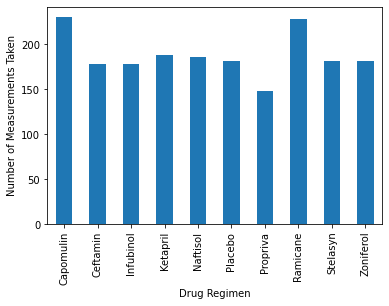

<Figure size 432x288 with 0 Axes>

In [126]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurement_df = combined_data[["Drug Regimen", "Mouse ID"]]
regimen_list = measurement_df.groupby("Drug Regimen")
num_meas_list = measurement_df.groupby("Drug Regimen").count()

measurement_chart = num_meas_list.plot(kind='bar', legend=False)

# Set the xlabel and ylabel using class methods
measurementmeasurement_chart.set_xlabel("Drug Regimen")
measurement_chart.set_ylabel("Number of Measurements Taken")


plt.show()
plt.tight_layout()

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.



In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
